In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import cv2
from scipy.optimize import curve_fit

In [2]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-11-26/*.jpg')])
print(f'imgs shape: {imgs.shape}')

imgs shape: (30, 1000, 640)


末尾"_all": すべて光らせたとき
末尾"_each": それぞれ光らせたとき

In [3]:
imgs_all = imgs[:6]
imgs_each = imgs[6:]
print(f'imgs_all: {imgs_all.shape}, imgs_each: {imgs_each.shape}')

imgs_all: (6, 1000, 640), imgs_each: (24, 1000, 640)


In [4]:
avg_rows_all = np.mean(imgs_all,axis=2)
avg_rows_each = np.mean(imgs_each,axis=2)
print(f'avg_rows_all: {avg_rows_all.shape}, avg_rows_each: {avg_rows_each.shape}')

avg_rows_all: (6, 1000), avg_rows_each: (24, 1000)


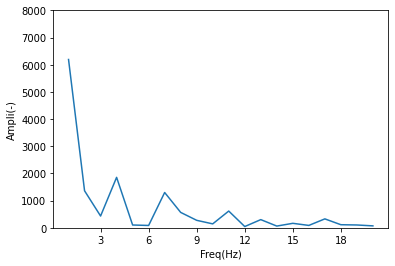

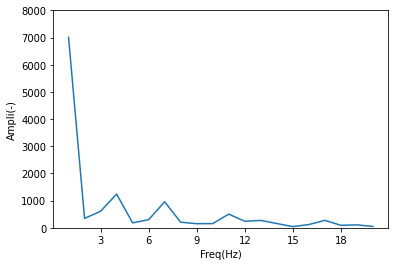

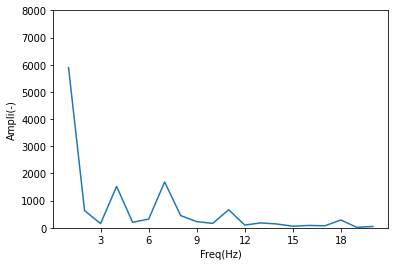

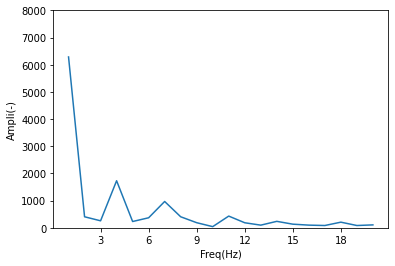

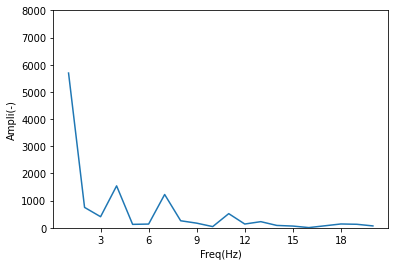

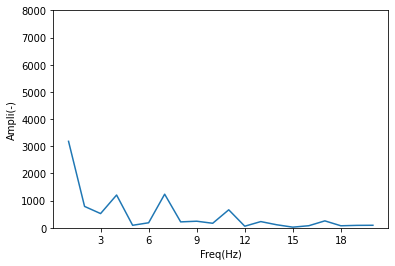

In [5]:
x = np.arange(1,21)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows_all])
for specs in specs_all:
    specs = specs[1:21]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,8000])
    plt.show()

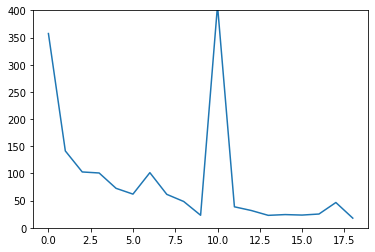

In [22]:
specs_each = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows_each])
plt.ylim([0,400])
plt.plot(specs_each[18,1:20])

In [7]:
specs_each_sum = np.array([np.sum(specs_each[i:24:6],axis=0) for i in range(6)])
print(f'specs_each_sum: {specs_each_sum.shape}')

specs_each_sum: (6, 501)


In [8]:
print(specs_each_sum[0,1:20])

[8264.81499011 1052.37311812 1104.42041752 1956.67516342  475.89779025
  610.66381071 1774.28800173  448.41598123  250.39251376  212.24477972
  632.64587294  165.22222023  237.42019269  236.7743413   139.58973923
  256.54273644  280.10785824  183.23387274  135.98556795]


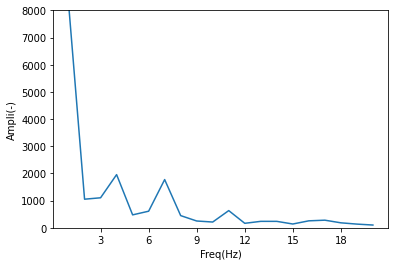

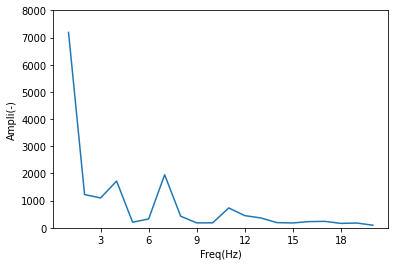

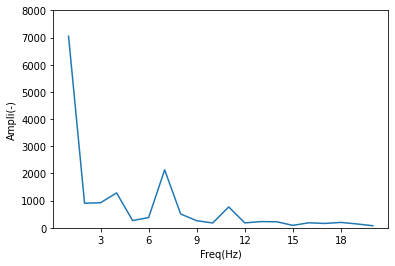

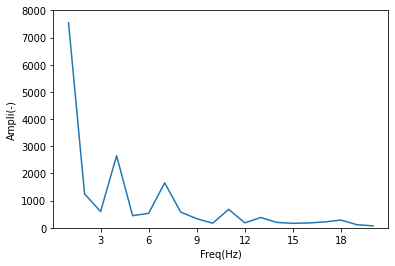

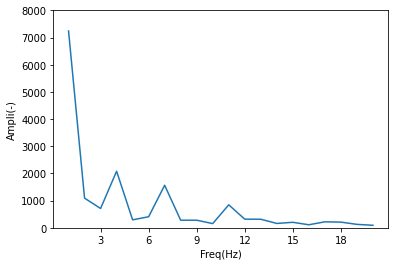

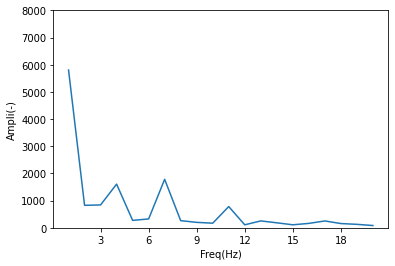

In [9]:
for specs_sum in specs_each_sum:
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs_sum[1:21])
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,8000])
    plt.show()

In [10]:
measure_positions = [
    [1.25,1.0],[1.25,1.5],[1.25,2.0],
    [1.75,1.0],[1.75,1.5],[1.75,2.0]
]
led_positions = [
    [1.0,1.0],[2.0,1.0],[1.0,2.0],[2.0,2.0]
]
distances = [[np.sqrt(np.square(measure[0] - led[0])+np.square(measure[1] - led[1])) for measure in measure_positions] \
    for led in led_positions]
print(distances)

[[0.25, 0.5590169943749475, 1.0307764064044151, 0.75, 0.9013878188659973, 1.25], [0.75, 0.9013878188659973, 1.25, 0.25, 0.5590169943749475, 1.0307764064044151], [1.0307764064044151, 0.5590169943749475, 0.25, 1.25, 0.9013878188659973, 0.75], [1.25, 0.9013878188659973, 0.75, 1.0307764064044151, 0.5590169943749475, 0.25]]


In [11]:
freq_peaks = specs_all[:,[1,4,7,11]].T
print(freq_peaks)

[[6192.07292809 7011.76147072 5894.88159112 6285.48841458 5694.14204684
  3181.17256921]
 [1855.98082938 1240.630173   1521.61059639 1730.79455171 1542.21186898
  1205.71405254]
 [1298.69514214  957.12174786 1685.56385753  968.31002189 1225.58588845
  1236.47052835]
 [ 615.99131915  503.12948619  664.1062554   430.94771891  520.94238318
   662.05980331]]


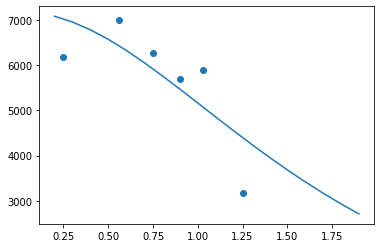

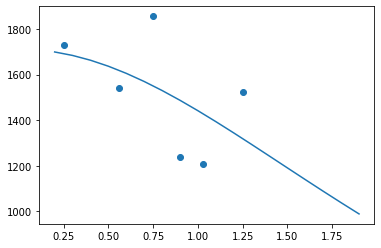

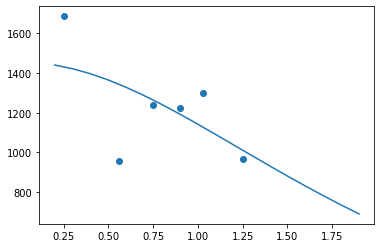

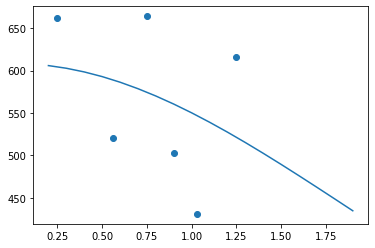

In [12]:
def theoreticalValue(x,a,b):
    f = a/(np.exp(np.pi*0.5*b*x)+np.exp(-np.pi*0.5*b*x))
    return f

#certain = np.abs(np.sin(LED_freq[i]*np.pi/sampling_freq)/(LED_freq[i]*np.pi/sampling_freq))*((2.24-1.16)**(0.82+5.35))

for i in range(len(freq_peaks)):
    beta,pconv = curve_fit(theoreticalValue,distances[i],freq_peaks[i])
    beta[1] = np.abs(beta[1])
    plt.scatter(distances[i],freq_peaks[i])
    q = np.arange(0.2,2.0,0.1)
    plt.plot(q,theoreticalValue(q, beta[0], beta[1]))
    plt.show()